# Анализ данных о бронировании отелей

Импорт необходимых для дальнейшей работы библиотек. Считывание данных из файла

In [26]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
bookings = pd.read_csv('bookings.csv', sep=';', parse_dates=['arrival full date', 'Reservation status_date'])

## Описание даннных


Имеются следующие переменные:

Hotel – тип отеля (City Hotel или Resort Hotel)  
Is canceled – бронирование было отменено (1) или нет (0); неотменённое считается успешным

Lead time – количество дней, прошедших между датой бронирования и датой прибытия  
Arrival full date – полная дата прибытия

Arrival date year – год прибытия  

Arrival date month – месяц прибытия  

Arrival date week number – номер недели прибытия

Arrival date day of month – день прибытия

Stays in weekend nights – количество выходных (суббота или воскресенье), которые гость забронировал для проживания в отеле

Stays in week nights – количество дней (с понедельника по пятницу), которые гость забронировал для проживания в отеле

Stays total nights – общее число забронированных ночей (сумма двух предыдущих колонок)

Adults – число взрослых

Children – число детей

Babies – число младенцев

Meal – выбранный тип питания

Country – страна происхождения клиента

Reserved room type – тип зарезервированного номера

Assigned room type – тип полученного номера (может отличаться от забронированного)

Customer type – тип бронирования

Reservation status – значение последнего статуса
брони: Canceled – было отменено клиентом; Check-Out – клиент зарегистрировался, но уже покинул отель; No-Show – клиент не зарегистрировался и сообщил администрации отеля причину

Reservation status date – дата обновления статуса

## Предобработка

Данные имеют следующий вид:

In [4]:
bookings.head()

,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,...,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03


Основная информация:

In [3]:
bookings.shape

(119390, 21)

In [5]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Hotel                      119390 non-null  object        
 1   Is Canceled                119390 non-null  int64         
 2   Lead Time                  119390 non-null  int64         
 3   arrival full date          119390 non-null  datetime64[ns]
 4   Arrival Date Year          119390 non-null  int64         
 5   Arrival Date Month         119390 non-null  object        
 6   Arrival Date Week Number   119390 non-null  int64         
 7   Arrival Date Day of Month  119390 non-null  int64         
 8   Stays in Weekend nights    119390 non-null  int64         
 9   Stays in week nights       119390 non-null  int64         
 10  stays total nights         119390 non-null  int64         
 11  Adults                     119390 non-null  int64   

Присутствует незначительное количество пропусков в столбцах Country и Children

Тк названия столбцов неудобны для работы, приведём названия колонок к нижнему регистру и заменим пробелы на знак нижнего подчеркивания:

In [29]:
bookings = bookings.rename(columns={i: i.lower().replace(' ','_') for i in bookings.columns})

## Пользователи из каких стран совершили наибольшее число успешных бронирований? Топ-5.

In [63]:
country_counts = bookings[bookings['is_canceled']==0]['country'].value_counts().nlargest(5)

<ipython-input-80-f21e6a07f7c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='mako')


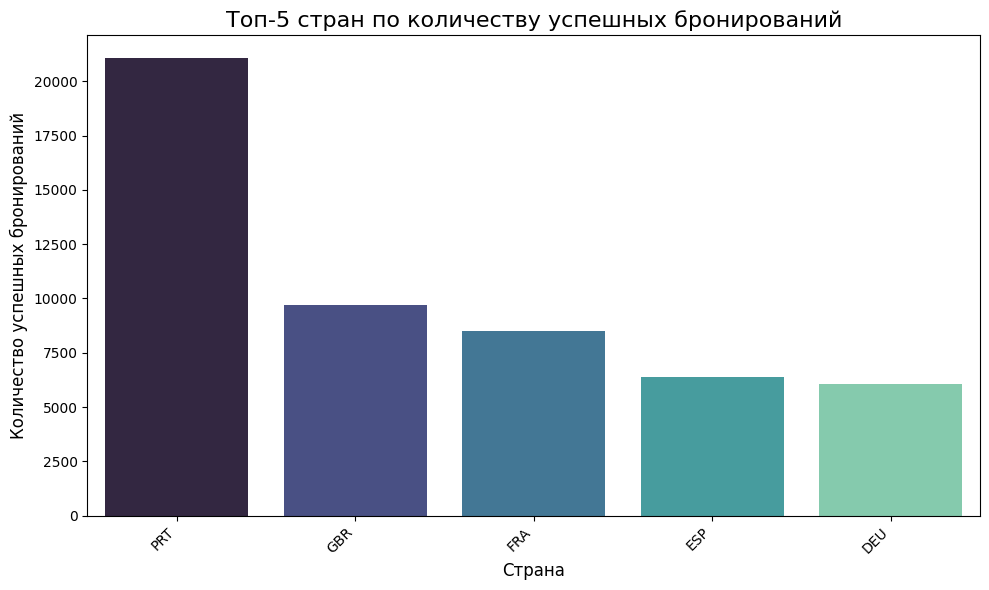

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='mako')
plt.title('Топ-5 стран по количеству успешных бронирований', fontsize=16)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество успешных бронирований', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## На сколько ночей в среднем бронируют отели разных типов?

In [31]:
bookings.groupby('hotel')['stays_total_nights'].mean().round(2)

,stays_total_nights
hotel,
City Hotel,2.98
Resort Hotel,4.32


## Сколько раз тип номера, полученного клиентом (assigned_room_type), отличается от изначально забронированного (reserved_room_type)?


In [34]:
bookings[bookings['reserved_room_type']!=bookings['assigned_room_type']].shape[0]

(14917, 21)

## Анализ дат запланированного прибытия.


– На какой месяц чаще всего успешно оформляли бронь в 2016? Изменился ли самый популярный месяц в 2017?

– На какой месяц бронирования отеля типа City Hotel отменялись чаще всего в каждый из периодов?

In [46]:
bookings[bookings['arrival_date_year']==2016].groupby(['arrival_date_year','arrival_date_month'])['is_canceled'].count().idxmax()

(2016, 'October')

In [47]:
bookings[bookings['arrival_date_year']==2017].groupby(['arrival_date_year','arrival_date_month'])['is_canceled'].count().idxmax()

(2017, 'May')

In [51]:
bookings[bookings['hotel']=='City Hotel'].groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].sum().groupby(['arrival_date_year']).idxmax()

,is_canceled
arrival_date_year,
2015,"(2015, September)"
2016,"(2016, October)"
2017,"(2017, May)"


<ipython-input-84-3bb453303fa3>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = bookings.groupby(['arrival_date_year', 'arrival_date_month', 'hotel']).size().reset_index(name='count')


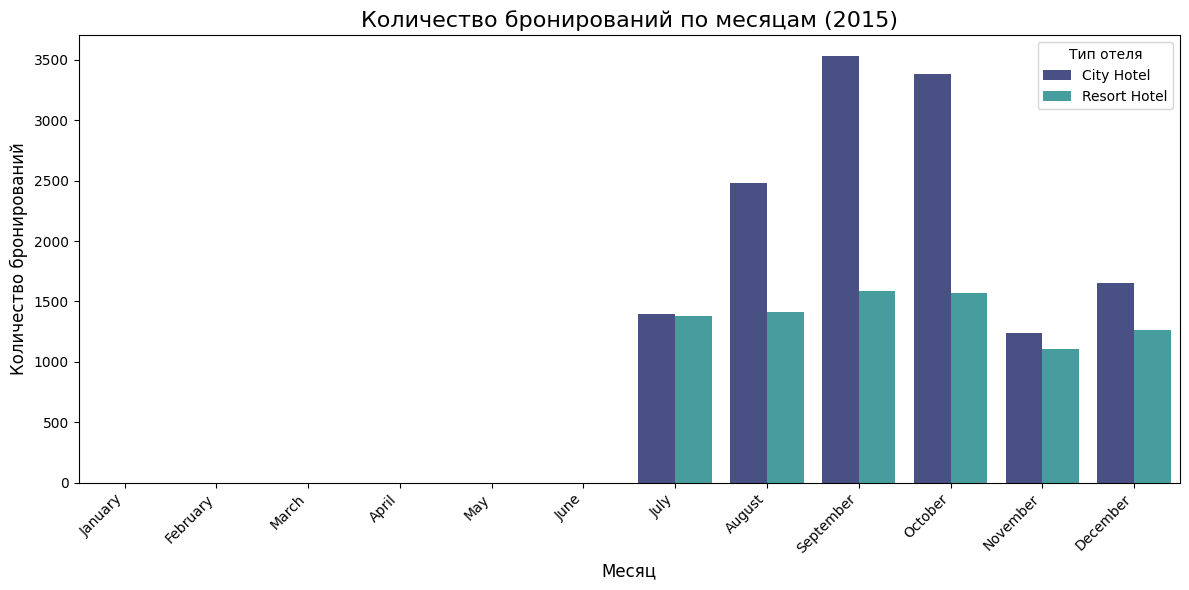

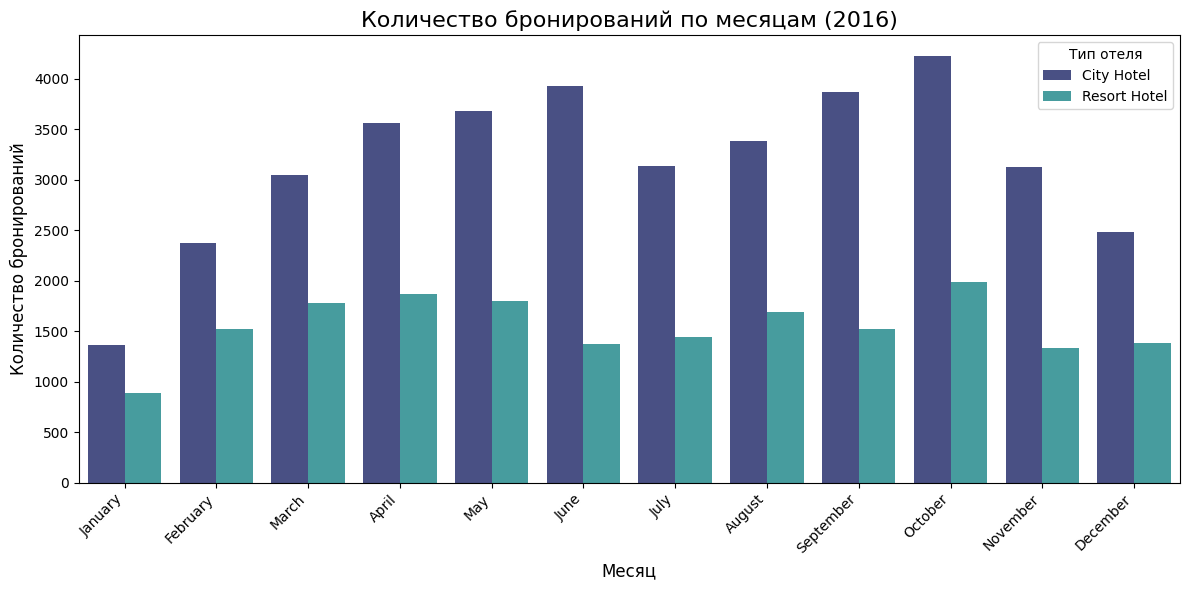

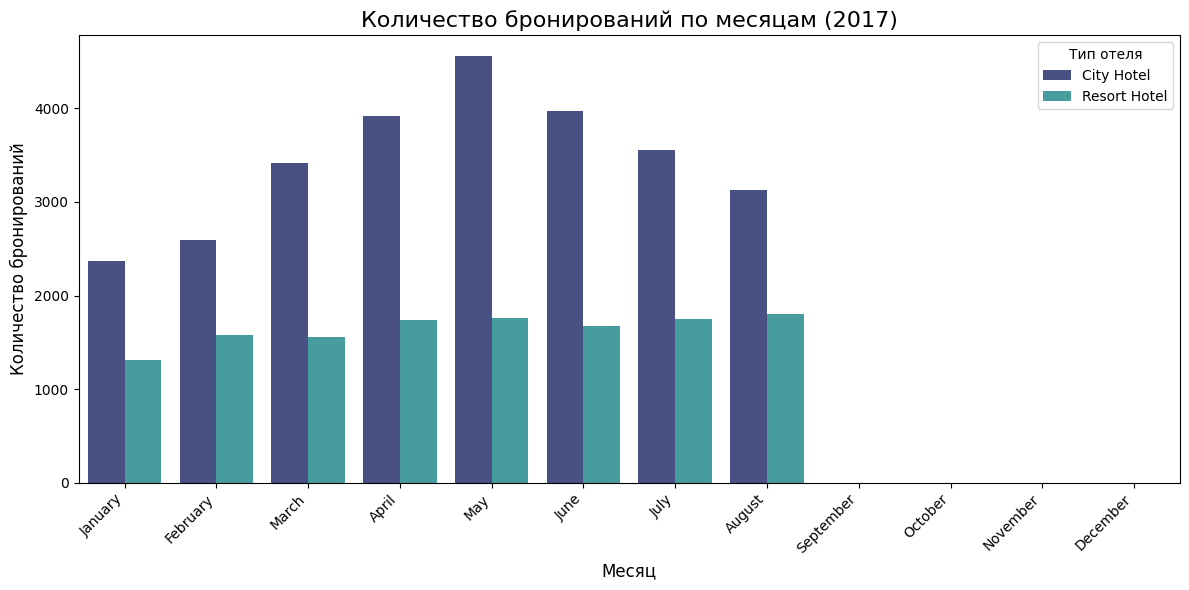

In [84]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bookings['arrival_date_month'] = pd.Categorical(bookings['arrival_date_month'], categories=months_order, ordered=True)
grouped_counts = bookings.groupby(['arrival_date_year', 'arrival_date_month', 'hotel']).size().reset_index(name='count')

years = grouped_counts['arrival_date_year'].unique()

for year in years:
    year_data = grouped_counts[grouped_counts['arrival_date_year'] == year]
    plt.figure(figsize=(12, 6))
    sns.barplot(x='arrival_date_month', y='count', hue='hotel', data=year_data, palette='mako')
    plt.title(f'Количество бронирований по месяцам ({year})', fontsize=16)
    plt.xlabel('Месяц', fontsize=12)
    plt.ylabel('Количество бронирований', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Тип отеля', fontsize=10)
    plt.tight_layout()
    plt.show()

## Временные тренды успешных бронирований

In [119]:
import plotly.express as px

time_trends = bookings[bookings['is_canceled'] == 0].groupby('arrival_full_date').size().reset_index(name='successful_bookings')

fig = px.line(
    time_trends,
    x='arrival_full_date',
    y='successful_bookings',
    title='Временные тренды успешных бронирований',
    labels={'arrival_full_date': 'Дата прибытия', 'successful_bookings': 'Количество успешных бронирований'},
    template='plotly_white'
)

fig.update_traces(line=dict(color='blue', width=2))
fig.update_layout(
    xaxis_title='Дата прибытия',
    yaxis_title='Количество успешных бронирований',
    hovermode='x unified'
)

fig.show()


## Анализ возрастных категорий

Какая из характеристик adults, children, babies имеет наибольшее среднее значение?

In [14]:
bookings[['adults','children','babies']].mean()

,0
adults,1.856403
children,0.103890
babies,0.007949


Создание нового признака 'total_kids', объединяющего столбцы 'children' и 'babies'

In [54]:
bookings['total_kids']=bookings['babies']+bookings['children']

Отели какого типа в среднем пользуются большей популярностью у клиентов с детьми?

In [16]:
bookings.groupby('hotel')['total_kids'].mean()

,total_kids
hotel,
City Hotel,0.096311
Resort Hotel,0.142586


Создание признака, определяющего, есть ли у заказчика дети

In [55]:
bookings['has_kids'] = bookings['total_kids']>0

### Расчёт отношения количества ушедших пользователей к общему количеству клиентов в зависимости от наличия детей, выраженное в процентах (churn rate).

In [61]:
churn_rate = (bookings.groupby('has_kids')['is_canceled'].sum()/bookings['has_kids'].value_counts()*100).round(2)
churn_rate.name='churn_rate'
churn_rate

,churn_rate
has_kids,
False,37.22
True,34.92


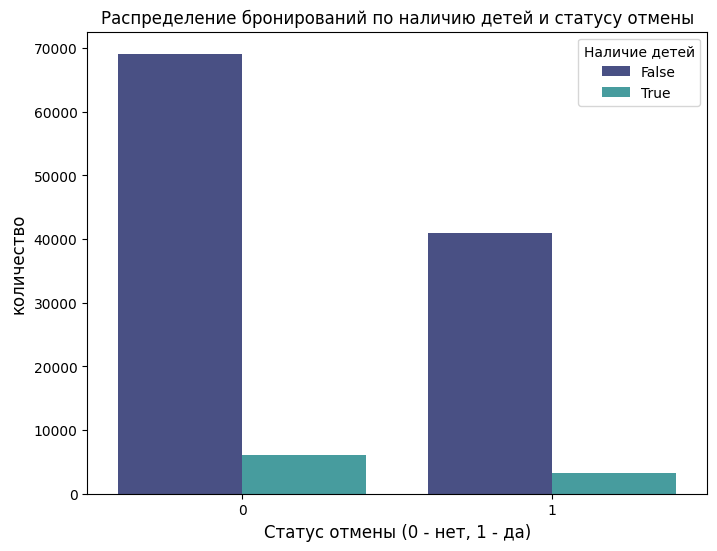

In [103]:
c_r = bookings.groupby('is_canceled').has_kids.value_counts().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='is_canceled', y='count', hue='has_kids', data=c_r, palette='mako')
plt.title('Распределение бронирований по наличию детей и статусу отмены')
plt.xlabel('Статус отмены (0 - нет, 1 - да)', fontsize=12)
plt.ylabel('количество', fontsize=12)
plt.legend(title='Наличие детей', fontsize=10)
plt.show()


## Гипотеза 1:

Гости с детьми чаще отменяют бронирования.

Формулировка:

H₀ (нулевая гипотеза): Наличие детей не влияет на частоту отмен.

H₁ (альтернативная гипотеза): Наличие детей влияет на частоту отмен.

In [108]:
from scipy.stats import chi2_contingency

# Таблица сопряженности
contingency_table = pd.crosstab(bookings['has_kids'], bookings['is_canceled'])

# χ²-тест
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"χ²: {chi2}, p-value: {p}")


χ²: 19.388797779351247, p-value: 1.0663070343154822e-05


Т.к. p-value < 0.05, отвергаем H₀ и принимаем H₁, что говорит о статистически значимой зависимости.

## Гипотеза 2:

Время ожидания до даты прибытия (lead_time) коррелирует с частотой отмен.

Формулировка:

H₀: Нет значимой корреляции между временем ожидания (lead_time) и частотой отмен.

H₁: Существует значимая корреляция между lead_time и отменами.

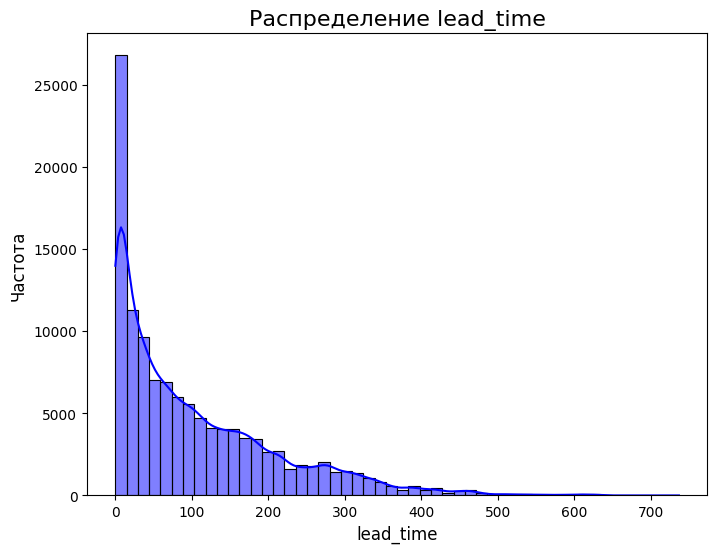

In [111]:
plt.figure(figsize=(8, 6))
sns.histplot(bookings['lead_time'], kde=True, bins=50, color='blue')
plt.title('Распределение lead_time', fontsize=16)
plt.xlabel('lead_time', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.show()

In [112]:
spearman_corr = bookings[['lead_time', 'is_canceled']].corr(method='spearman').iloc[0, 1]
print(f"Коэффициент корреляции Спирмена: {spearman_corr:.2f}")

Коэффициент корреляции Спирмена: 0.32


Коэффициент > 0.3 (умеренная положительная корреляция), гипотеза о связи между временем ожидания и отменами выглядит правдоподобной.

<ipython-input-113-3b39cad88d21>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='lead_time', data=bookings, palette='mako')


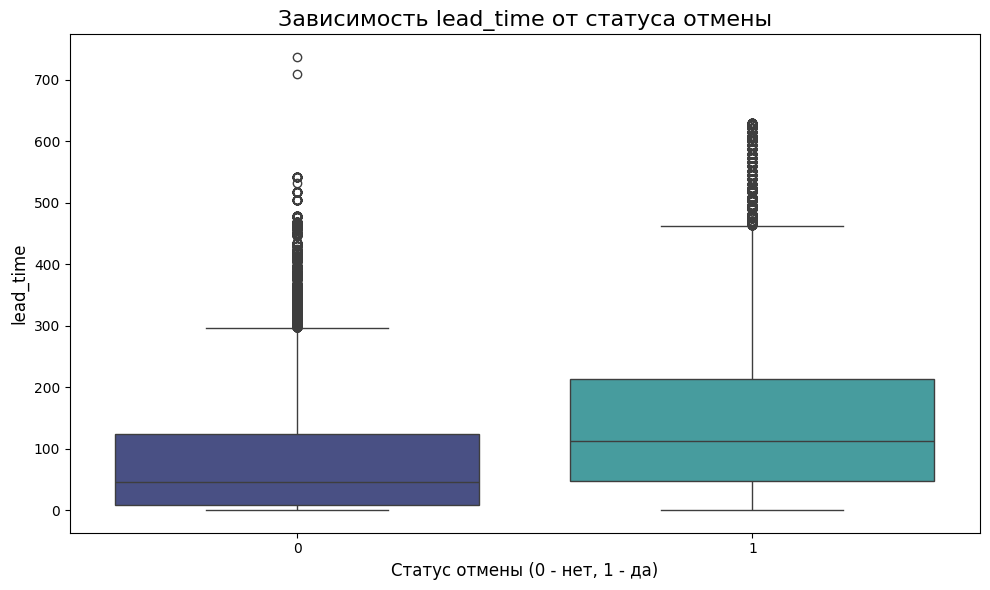

In [113]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=bookings, palette='mako')
plt.title('Зависимость lead_time от статуса отмены', fontsize=16)
plt.xlabel('Статус отмены (0 - нет, 1 - да)', fontsize=12)
plt.ylabel('lead_time', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Проверка статистической значимости (р-тест)
Проведём тест Манна-Уитни для сравнения двух групп (отменённые/не отменённые).

In [115]:
from scipy.stats import mannwhitneyu

lead_time_canceled = bookings[bookings['is_canceled'] == 1]['lead_time']
lead_time_not_canceled = bookings[bookings['is_canceled'] == 0]['lead_time']

stat, p = mannwhitneyu(lead_time_canceled, lead_time_not_canceled, alternative='two-sided')
print(f"U-статистика: {stat}, p-value: {p}")

U-статистика: 2291186266.5, p-value: 0.0


Коэффициент > 0.3 и p-value < 0.05, это подтверждает связь между временем ожидания и вероятностью отмен.